In [122]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [123]:
df = pd.read_csv('weatherHistory.csv')   
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [124]:
df['Precip Type'] = df['Precip Type'].fillna('Unknown')
df.isnull().sum()   

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [125]:
print('Formatted Date' in df.columns)

True


In [126]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')

df['month'] = df['Formatted Date'].dt.month
df['year'] = df['Formatted Date'].dt.year

C:\Users\Mary rose\AppData\Local\Temp\ipykernel_2376\1705425286.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])


In [127]:
avg_temp = df.groupby('month')['Temperature (C)'].mean( )
print(avg_temp) 

month
3.0     10.819368
4.0     12.756417
5.0     16.873692
6.0     20.715617
7.0     22.963943
8.0     22.345031
9.0     17.516790
10.0    11.695224
Name: Temperature (C), dtype: float64


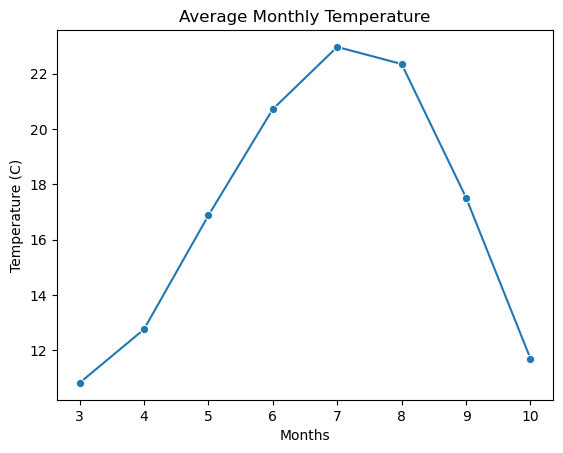

In [128]:
plt.Figure(figsize=(10,6))  
sns.lineplot(x=avg_temp.index, y=avg_temp.values, marker='o')
plt.title('Average Monthly Temperature')
plt.xlabel('Months')
plt.ylabel('Temperature (C)')   
plt.show()

In [129]:
hottest_day = df['Temperature (C)'].idxmax()
print("hottest day:", hottest_day,"Temperature:", df.loc[hottest_day, 'Temperature (C)'])

hottest day: 12759 Temperature: 39.90555555555555


In [139]:
day_hottest = df.groupby('Temperature (C)')['Formatted Date'].idxmax().sort_values(ascending=False)
print(day_hottest.head(10)) 

Temperature (C)
20.438889    96452.0
21.522222    96451.0
22.038889    96450.0
24.583333    96449.0
28.838889    96447.0
30.766667    96446.0
31.083333    96445.0
30.894444    96443.0
30.994444    96442.0
27.072222    96440.0
Name: Formatted Date, dtype: float64


In [137]:
day_coldest = df.groupby('Temperature (C)')['Formatted Date'].idxmin().sort_values(ascending=True)
print(day_coldest.head(10)) 

Temperature (C)
9.472222      0.0
9.377778      2.0
8.288889      3.0
8.755556      4.0
9.222222      5.0
7.733333      6.0
8.772222      7.0
10.822222     8.0
13.772222     9.0
16.016667    10.0
Name: Formatted Date, dtype: float64


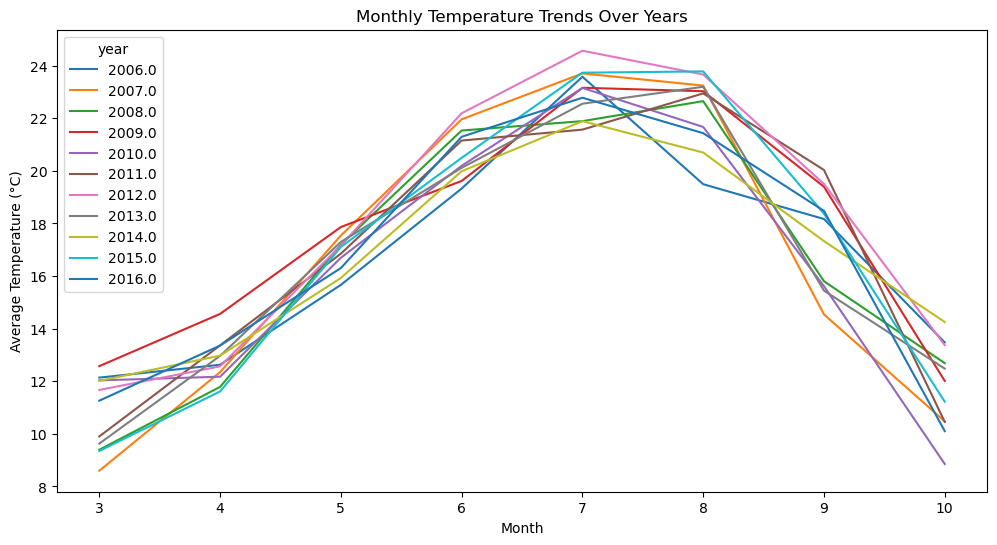

In [132]:
monthly_avg = df.groupby(['year','month'])['Temperature (C)'].mean().unstack(level=0)


monthly_avg.plot(figsize=(12,6))
plt.title("Monthly Temperature Trends Over Years")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.show()
